In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment2/'
FOLDERNAME = '/content/drive/MyDrive/Stanford Research/honor thesis for Ephysics/ephysics project/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
# %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# !bash get_datasets.sh
# %cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive


In [4]:
# !pip install pymatgen
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

import sklearn
import csv
import pandas as pd
# import pymatgen as mg
import random
import os
from bisect import bisect_left   
from sklearn import preprocessing
from sklearn.utils import Bunch
from sklearn import svm
# from mp_api.client import MPRester

#from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import time


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, KFold

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix


style.use("ggplot")

In [3]:
#shuffles dataset
def format_dataset(X, y, size = -1):
    random.seed(a=5)
    length = np.size(y)
    indices = np.arange(length)
    np.random.shuffle(indices)
    new_X = []
    new_y = []
    for x in indices:
        new_X.append(X[x])
        new_y.append(y[x])
    if size == -1:
        return Bunch(data=new_X, target=new_y)
    return Bunch(data=new_X[0:size], target=new_y[0:size])

#pos, neg are lists
def get_labels(pos, neg):
    y = []
    for i in range(len(pos)):
        y.append(1)
    for i in range(len(neg)):
        y.append(0)
    return np.array(y)


def calculate_classification_rates(predictions, labels):
    """
    Calculates the classification rates based on the predictions and labels.

    Args:
    - predictions: NumPy array of predicted values (shape: [n_samples])
    - labels: List of true labels (length: n_samples)

    Returns:
    - true_positive_rate: Float, true positive rate (TPR) or sensitivity
    - false_positive_rate: Float, false positive rate (FPR)
    - true_negative_rate: Float, true negative rate (TNR) or specificity
    - false_negative_rate: Float, false negative rate (FNR)
    """

    # Convert labels to NumPy array for easier manipulation
    labels = np.array(labels)

    # Calculate the number of true positive, false positive, true negative, and false negative
    true_positive = np.sum((predictions == 1) & (labels == 1))
    false_positive = np.sum((predictions == 1) & (labels == 0))
    true_negative = np.sum((predictions == 0) & (labels == 0))
    false_negative = np.sum((predictions == 0) & (labels == 1))

    # Calculate the rates
    true_positive_rate = true_positive / (true_positive + false_negative)
    false_positive_rate = false_positive / (false_positive + true_negative)
    true_negative_rate = true_negative / (true_negative + false_positive)
    false_negative_rate = false_negative / (false_negative + true_positive)

    return true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate

In [ ]:
# multipliers = [1, 2, 4, 8]
# for multip in multipliers:
#   print('experiment with multiple:' + str(multip))
#   # loading data
#   X_pos = np.load(FOLDERNAME + '/partial_perfect_in_icsd.npy')
#   X_neg = np.load(FOLDERNAME + '/not_in_icsd_proofread.npy')
#   X_neg = X_neg[:10899*multip, :]

#   #concatenate the features together and scale
#   X = np.concatenate((X_pos, X_neg), axis = 0)
#   std_scale=preprocessing.StandardScaler().fit(X)
#   X = std_scale.transform(X)

#   #get output label
#   y = []

#   y=get_labels(X_pos,X_neg)

#     # Split the data into training and testing sets
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#   model_kernel = KernelSVM(X_train, kernel='rbf')
#   opt_kernel = torch.optim.SGD(model_kernel.parameters(), lr=0.1)


#   # Check if GPU is available
#   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#   # Convert the data to PyTorch tensors and move them to the GPU
#   X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
#   y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
#   X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
#   y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

#   ##### Define the SVM model and kernel

  


#   #######
  

#   # Define the loss function
#   criterion = nn.BCEWithLogitsLoss()

#   # Define the number of folds for cross-validation
#   num_folds = 5

#   # Perform cross-validation
#   kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

#   # Initialize lists to store accuracy for each fold
#   fold_accuracies = []

#   for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
#       print(f"Fold {fold+1}/{num_folds}")

#       # Split data into training and validation sets for the current fold
#       fold_X_train, fold_X_val = X_train[train_index], X_train[val_index]
#       fold_y_train, fold_y_val = y_train[train_index], y_train[val_index]

#       # Create a TensorDataset and DataLoader for training
#       train_dataset = TensorDataset(fold_X_train, fold_y_train)
#       train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

#       # Initialize the SVM model
#       svm = SVM()

#       # Move the SVM model to GPU if available
#       device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#       svm.to(device)
#       model = svm

#       # Evaluation on validation set
#       with torch.no_grad():
#           val_outputs = model(fold_X_val)
#           val_predictions = (val_outputs > 0.5).float().cpu().numpy()
          
#           true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate = calculate_classification_rates(val_predictions, fold_y_val.cpu().numpy())
#           print('true_positive_rate:' + str(true_positive_rate))
#           print('false_positive_rate:' + str(false_positive_rate))
#           print('true_negative_rate:' + str(true_negative_rate))
#           print('false_negative_rate:' + str(false_negative_rate))
          
#           fold_accuracy = accuracy_score(fold_y_val.cpu().numpy(), val_predictions)
#           fold_accuracies.append(fold_accuracy)
#           print(f"Validation Accuracy: {fold_accuracy}")

#   # Calculate mean accuracy across all folds
#   mean_accuracy = sum(fold_accuracies) / num_folds
#   print(f"Mean Cross-Validation Accuracy: {mean_accuracy}")

#   # Final evaluation on the test set
#   with torch.no_grad():
#       test_outputs = model(X_test)
#       test_predictions = (test_outputs > 0.5).float().cpu().numpy()
#       true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate = calculate_classification_rates(test_predictions, y_test.cpu().numpy())
#       print('true_positive_rate:' + str(true_positive_rate))
#       print('false_positive_rate:' + str(false_positive_rate))
#       print('true_negative_rate:' + str(true_negative_rate))
#       print('false_negative_rate:' + str(false_negative_rate))
#       test_accuracy = accuracy_score(y_test.cpu().numpy(), test_predictions)
#       print(f"Test Accuracy: {test_accuracy}")

experiment with multiple:1


<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0741, Train Acc: 97.30%, Val Loss: 0.0096, Val Acc: 99.68%
TP: 0.9959677419354839, TN: 0.997716894977169, FP: 0.00228310502283105, FN: 0.004032258064516129
Epoch [2/10], Train Loss: 0.0148, Train Acc: 99.56%, Val Loss: 0.0067, Val Acc: 99.77%
TP: 0.9982718894009217, TN: 0.9971461187214612, FP: 0.0028538812785388126, FN: 0.0017281105990783411
Epoch [3/10], Train Loss: 0.0070, Train Acc: 99.78%, Val Loss: 0.0028, Val Acc: 99.89%
TP: 0.9988479262672811, TN: 0.9988584474885844, FP: 0.001141552511415525, FN: 0.001152073732718894
Epoch [4/10], Train Loss: 0.0059, Train Acc: 99.83%, Val Loss: 0.0116, Val Acc: 99.51%
TP: 0.9994239631336406, TN: 0.9908675799086758, FP: 0.0091324200913242, FN: 0.000576036866359447
Epoch [5/10], Train Loss: 0.0049, Train Acc: 99.81%, Val Loss: 0.0035, Val Acc: 99.89%
TP: 0.9982718894009217, TN: 0.9994292237442922, FP: 0.0005707762557077625, FN: 0.0017281105990783411
Epoch [6/10], Train Loss: 0.0062, Train Acc: 99.78%, Val Loss: 0.0023,

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0706, Train Acc: 97.42%, Val Loss: 0.0261, Val Acc: 99.28%
TP: 0.9919354838709677, TN: 0.9937214611872146, FP: 0.006278538812785388, FN: 0.008064516129032258
Epoch [2/10], Train Loss: 0.0138, Train Acc: 99.61%, Val Loss: 0.0236, Val Acc: 99.28%
TP: 0.9953917050691244, TN: 0.990296803652968, FP: 0.009703196347031963, FN: 0.004608294930875576
Epoch [3/10], Train Loss: 0.0086, Train Acc: 99.73%, Val Loss: 0.0298, Val Acc: 99.20%
TP: 0.9844470046082949, TN: 0.9994292237442922, FP: 0.0005707762557077625, FN: 0.01555299539170507
Epoch [4/10], Train Loss: 0.0060, Train Acc: 99.84%, Val Loss: 0.0108, Val Acc: 99.89%
TP: 0.9976958525345622, TN: 1.0, FP: 0.0, FN: 0.002304147465437788
Epoch [5/10], Train Loss: 0.0027, Train Acc: 99.94%, Val Loss: 0.0117, Val Acc: 99.83%
TP: 0.9971198156682027, TN: 0.9994292237442922, FP: 0.0005707762557077625, FN: 0.002880184331797235
Epoch [6/10], Train Loss: 0.0025, Train Acc: 99.94%, Val Loss: 0.0197, Val Acc: 99.63%
TP: 0.992511520

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0749, Train Acc: 97.34%, Val Loss: 0.0261, Val Acc: 99.08%
TP: 0.9907887161773172, TN: 0.9908623643632211, FP: 0.009137635636778984, FN: 0.009211283822682787
Epoch [2/10], Train Loss: 0.0128, Train Acc: 99.73%, Val Loss: 0.0306, Val Acc: 99.11%
TP: 0.982153137593552, TN: 1.0, FP: 0.0, FN: 0.017846862406447898
Epoch [3/10], Train Loss: 0.0073, Train Acc: 99.80%, Val Loss: 0.0120, Val Acc: 99.51%
TP: 0.9953943580886586, TN: 0.9948600799543118, FP: 0.005139920045688178, FN: 0.004605641911341394
Epoch [4/10], Train Loss: 0.0057, Train Acc: 99.82%, Val Loss: 0.0050, Val Acc: 99.86%
TP: 0.9976971790443293, TN: 0.9994288977727013, FP: 0.0005711022272986865, FN: 0.002302820955670697
Epoch [5/10], Train Loss: 0.0051, Train Acc: 99.84%, Val Loss: 0.0050, Val Acc: 99.91%
TP: 0.9988485895221646, TN: 0.9994288977727013, FP: 0.0005711022272986865, FN: 0.0011514104778353484
Epoch [6/10], Train Loss: 0.0029, Train Acc: 99.89%, Val Loss: 0.0077, Val Acc: 99.80%
TP: 0.9994242

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0728, Train Acc: 97.48%, Val Loss: 0.0142, Val Acc: 99.71%
TP: 0.9942396313364056, TN: 1.0, FP: 0.0, FN: 0.00576036866359447
Epoch [2/10], Train Loss: 0.0121, Train Acc: 99.69%, Val Loss: 0.0123, Val Acc: 99.57%
TP: 0.9976958525345622, TN: 0.9937178754997145, FP: 0.006282124500285551, FN: 0.002304147465437788
Epoch [3/10], Train Loss: 0.0070, Train Acc: 99.79%, Val Loss: 0.0043, Val Acc: 99.94%
TP: 0.9988479262672811, TN: 1.0, FP: 0.0, FN: 0.001152073732718894
Epoch [4/10], Train Loss: 0.0054, Train Acc: 99.81%, Val Loss: 0.0038, Val Acc: 99.91%
TP: 0.9982718894009217, TN: 1.0, FP: 0.0, FN: 0.0017281105990783411
Epoch [5/10], Train Loss: 0.0058, Train Acc: 99.78%, Val Loss: 0.0021, Val Acc: 99.97%
TP: 0.9994239631336406, TN: 1.0, FP: 0.0, FN: 0.000576036866359447
Epoch [6/10], Train Loss: 0.0025, Train Acc: 99.91%, Val Loss: 0.0025, Val Acc: 99.94%
TP: 0.9988479262672811, TN: 1.0, FP: 0.0, FN: 0.001152073732718894
Epoch [7/10], Train Loss: 0.0035, Train Acc:

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0730, Train Acc: 97.44%, Val Loss: 0.0134, Val Acc: 99.66%
TP: 0.9930875576036866, TN: 1.0, FP: 0.0, FN: 0.0069124423963133645
Epoch [2/10], Train Loss: 0.0126, Train Acc: 99.63%, Val Loss: 0.0060, Val Acc: 99.80%
TP: 0.9971198156682027, TN: 0.9988577955454027, FP: 0.001142204454597373, FN: 0.002880184331797235
Epoch [3/10], Train Loss: 0.0059, Train Acc: 99.84%, Val Loss: 0.0028, Val Acc: 99.89%
TP: 0.9976958525345622, TN: 1.0, FP: 0.0, FN: 0.002304147465437788
Epoch [4/10], Train Loss: 0.0066, Train Acc: 99.79%, Val Loss: 0.0035, Val Acc: 99.83%
TP: 0.9965437788018433, TN: 1.0, FP: 0.0, FN: 0.0034562211981566822
Epoch [5/10], Train Loss: 0.0038, Train Acc: 99.87%, Val Loss: 0.0075, Val Acc: 99.77%
TP: 0.9953917050691244, TN: 1.0, FP: 0.0, FN: 0.004608294930875576
Epoch [6/10], Train Loss: 0.0039, Train Acc: 99.86%, Val Loss: 0.0060, Val Acc: 99.77%
TP: 0.9982718894009217, TN: 0.9971444888635066, FP: 0.0028555111364934323, FN: 0.0017281105990783411
Epoch [7

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0274, Train Acc: 99.21%, Val Loss: 0.0045, Val Acc: 99.91%
TP: 0.9960159362549801, TN: 0.9998563837426396, FP: 0.0001436162573603332, FN: 0.00398406374501992
Epoch [2/10], Train Loss: 0.0047, Train Acc: 99.87%, Val Loss: 0.0049, Val Acc: 99.81%
TP: 0.9988616960728515, TN: 0.997845756139595, FP: 0.002154243860404998, FN: 0.0011383039271485487
Epoch [3/10], Train Loss: 0.0028, Train Acc: 99.91%, Val Loss: 0.0122, Val Acc: 99.63%
TP: 0.983494593056346, TN: 0.999569151227919, FP: 0.00043084877208099956, FN: 0.016505406943653957
Epoch [4/10], Train Loss: 0.0028, Train Acc: 99.94%, Val Loss: 0.0027, Val Acc: 99.93%
TP: 0.9965850882185544, TN: 1.0, FP: 0.0, FN: 0.003414911781445646
Epoch [5/10], Train Loss: 0.0021, Train Acc: 99.94%, Val Loss: 0.0017, Val Acc: 99.95%
TP: 0.9977233921457029, TN: 1.0, FP: 0.0, FN: 0.0022766078542970974
Epoch [6/10], Train Loss: 0.0024, Train Acc: 99.92%, Val Loss: 0.0043, Val Acc: 99.87%
TP: 0.9977233921457029, TN: 0.9989946861984776

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0304, Train Acc: 98.85%, Val Loss: 0.0039, Val Acc: 99.93%
TP: 0.9965831435079726, TN: 1.0, FP: 0.0, FN: 0.003416856492027335
Epoch [2/10], Train Loss: 0.0058, Train Acc: 99.82%, Val Loss: 0.0052, Val Acc: 99.90%
TP: 0.9977220956719818, TN: 0.9992819187131984, FP: 0.0007180812868016659, FN: 0.002277904328018223
Epoch [3/10], Train Loss: 0.0032, Train Acc: 99.92%, Val Loss: 0.0065, Val Acc: 99.87%
TP: 0.9937357630979499, TN: 1.0, FP: 0.0, FN: 0.006264236902050114
Epoch [4/10], Train Loss: 0.0030, Train Acc: 99.90%, Val Loss: 0.0033, Val Acc: 99.94%
TP: 0.9971526195899773, TN: 1.0, FP: 0.0, FN: 0.0028473804100227792
Epoch [5/10], Train Loss: 0.0019, Train Acc: 99.95%, Val Loss: 0.0030, Val Acc: 99.97%
TP: 0.9982915717539863, TN: 1.0, FP: 0.0, FN: 0.0017084282460136675
Epoch [6/10], Train Loss: 0.0016, Train Acc: 99.95%, Val Loss: 0.0028, Val Acc: 99.97%
TP: 0.9982915717539863, TN: 1.0, FP: 0.0, FN: 0.0017084282460136675
Epoch [7/10], Train Loss: 0.0012, Train 

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0323, Train Acc: 98.89%, Val Loss: 0.0081, Val Acc: 99.75%
TP: 0.9874715261958997, TN: 1.0, FP: 0.0, FN: 0.012528473804100227
Epoch [2/10], Train Loss: 0.0061, Train Acc: 99.83%, Val Loss: 0.0033, Val Acc: 99.94%
TP: 0.9971526195899773, TN: 1.0, FP: 0.0, FN: 0.0028473804100227792
Epoch [3/10], Train Loss: 0.0043, Train Acc: 99.86%, Val Loss: 0.0017, Val Acc: 99.92%
TP: 0.9960136674259681, TN: 1.0, FP: 0.0, FN: 0.003986332574031891
Epoch [4/10], Train Loss: 0.0026, Train Acc: 99.92%, Val Loss: 0.0014, Val Acc: 99.95%
TP: 0.9977220956719818, TN: 1.0, FP: 0.0, FN: 0.002277904328018223
Epoch [5/10], Train Loss: 0.0043, Train Acc: 99.89%, Val Loss: 0.0036, Val Acc: 99.90%
TP: 0.9971526195899773, TN: 0.9994255349705586, FP: 0.0005744650294413328, FN: 0.0028473804100227792
Epoch [6/10], Train Loss: 0.0022, Train Acc: 99.93%, Val Loss: 0.0008, Val Acc: 99.95%
TP: 0.9977220956719818, TN: 1.0, FP: 0.0, FN: 0.002277904328018223
Epoch [7/10], Train Loss: 0.0016, Train A

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0283, Train Acc: 99.10%, Val Loss: 0.0337, Val Acc: 99.06%
TP: 0.9533029612756264, TN: 1.0, FP: 0.0, FN: 0.04669703872437358
Epoch [2/10], Train Loss: 0.0057, Train Acc: 99.85%, Val Loss: 0.0027, Val Acc: 99.91%
TP: 0.9954441913439636, TN: 1.0, FP: 0.0, FN: 0.004555808656036446
Epoch [3/10], Train Loss: 0.0032, Train Acc: 99.91%, Val Loss: 0.0018, Val Acc: 99.93%
TP: 0.9965831435079726, TN: 1.0, FP: 0.0, FN: 0.003416856492027335
Epoch [4/10], Train Loss: 0.0039, Train Acc: 99.88%, Val Loss: 0.0019, Val Acc: 99.98%
TP: 0.9988610478359908, TN: 1.0, FP: 0.0, FN: 0.0011389521640091116
Epoch [5/10], Train Loss: 0.0016, Train Acc: 99.96%, Val Loss: 0.0019, Val Acc: 99.91%
TP: 0.9954441913439636, TN: 1.0, FP: 0.0, FN: 0.004555808656036446
Epoch [6/10], Train Loss: 0.0019, Train Acc: 99.94%, Val Loss: 0.0057, Val Acc: 99.82%
TP: 1.0, TN: 0.9977021398822347, FP: 0.002297860117765331, FN: 0.0
Epoch [7/10], Train Loss: 0.0029, Train Acc: 99.91%, Val Loss: 0.0018, Val A

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0299, Train Acc: 99.01%, Val Loss: 0.0059, Val Acc: 99.85%
TP: 0.9931701764371087, TN: 0.9998563631140477, FP: 0.00014363688595231256, FN: 0.006829823562891292
Epoch [2/10], Train Loss: 0.0055, Train Acc: 99.85%, Val Loss: 0.0048, Val Acc: 99.91%
TP: 0.9960159362549801, TN: 0.9998563631140477, FP: 0.00014363688595231256, FN: 0.00398406374501992
Epoch [3/10], Train Loss: 0.0039, Train Acc: 99.90%, Val Loss: 0.0039, Val Acc: 99.92%
TP: 0.9960159362549801, TN: 1.0, FP: 0.0, FN: 0.00398406374501992
Epoch [4/10], Train Loss: 0.0027, Train Acc: 99.93%, Val Loss: 0.0032, Val Acc: 99.92%
TP: 0.9960159362549801, TN: 1.0, FP: 0.0, FN: 0.00398406374501992
Epoch [5/10], Train Loss: 0.0037, Train Acc: 99.87%, Val Loss: 0.0039, Val Acc: 99.92%
TP: 0.9960159362549801, TN: 1.0, FP: 0.0, FN: 0.00398406374501992
Epoch [6/10], Train Loss: 0.0016, Train Acc: 99.95%, Val Loss: 0.0020, Val Acc: 99.93%
TP: 0.9965850882185544, TN: 1.0, FP: 0.0, FN: 0.003414911781445646
Epoch [7/10]

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0922, Train Acc: 97.07%, Val Loss: 0.0670, Val Acc: 97.91%
TP: 0.7611174458380844, TN: 0.9927936325828195, FP: 0.007206367417180554, FN: 0.23888255416191562
Epoch [2/10], Train Loss: 0.0597, Train Acc: 98.07%, Val Loss: 0.0677, Val Acc: 97.71%
TP: 0.8010262257696693, TN: 0.9881686505091065, FP: 0.011831349490893445, FN: 0.19897377423033066
Epoch [3/10], Train Loss: 0.0500, Train Acc: 98.42%, Val Loss: 0.0505, Val Acc: 98.42%
TP: 0.758266818700114, TN: 0.9983866341603327, FP: 0.001613365839667288, FN: 0.24173318129988597
Epoch [4/10], Train Loss: 0.0454, Train Acc: 98.54%, Val Loss: 0.0458, Val Acc: 98.63%
TP: 0.8175598631698974, TN: 0.99688082604331, FP: 0.0031191739566900903, FN: 0.18244013683010263
Epoch [5/10], Train Loss: 0.0409, Train Acc: 98.71%, Val Loss: 0.0439, Val Acc: 98.71%
TP: 0.8329532497149373, TN: 0.9967732683206654, FP: 0.003226731679334576, FN: 0.16704675028506272
Epoch [6/10], Train Loss: 0.0375, Train Acc: 98.80%, Val Loss: 0.0441, Val Ac

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0925, Train Acc: 96.97%, Val Loss: 0.0723, Val Acc: 97.61%
TP: 0.6322690992018244, TN: 0.9977053529812484, FP: 0.002294647018751569, FN: 0.3677309007981756
Epoch [2/10], Train Loss: 0.0601, Train Acc: 98.05%, Val Loss: 0.0548, Val Acc: 98.33%
TP: 0.8015963511972634, TN: 0.994693628769137, FP: 0.005306371230863002, FN: 0.19840364880273662
Epoch [3/10], Train Loss: 0.0501, Train Acc: 98.41%, Val Loss: 0.0495, Val Acc: 98.51%
TP: 0.8084378563283923, TN: 0.9962353447348608, FP: 0.003764655265139292, FN: 0.19156214367160776
Epoch [4/10], Train Loss: 0.0446, Train Acc: 98.57%, Val Loss: 0.0483, Val Acc: 98.55%
TP: 0.8124287343215507, TN: 0.9963429063138647, FP: 0.0036570936861353123, FN: 0.18757126567844926
Epoch [5/10], Train Loss: 0.0411, Train Acc: 98.70%, Val Loss: 0.0453, Val Acc: 98.56%
TP: 0.830672748004561, TN: 0.9953031443834929, FP: 0.004696855616507117, FN: 0.169327251995439
Epoch [6/10], Train Loss: 0.0382, Train Acc: 98.81%, Val Loss: 0.0405, Val Acc:

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0932, Train Acc: 96.94%, Val Loss: 0.0702, Val Acc: 97.71%
TP: 0.750285062713797, TN: 0.9913592198200136, FP: 0.008640780179986375, FN: 0.24971493728620298
Epoch [2/10], Train Loss: 0.0601, Train Acc: 98.11%, Val Loss: 0.0522, Val Acc: 98.24%
TP: 0.7548460661345496, TN: 0.9967014449105446, FP: 0.00329855508945538, FN: 0.2451539338654504
Epoch [3/10], Train Loss: 0.0511, Train Acc: 98.39%, Val Loss: 0.0480, Val Acc: 98.44%
TP: 0.7799315849486887, TN: 0.9973109605249005, FP: 0.0026890394750994943, FN: 0.22006841505131128
Epoch [4/10], Train Loss: 0.0450, Train Acc: 98.57%, Val Loss: 0.0499, Val Acc: 98.34%
TP: 0.8215507411630558, TN: 0.9935463052597612, FP: 0.006453694740238786, FN: 0.17844925883694412
Epoch [5/10], Train Loss: 0.0409, Train Acc: 98.72%, Val Loss: 0.0413, Val Acc: 98.73%
TP: 0.8403648802736602, TN: 0.9965580294718727, FP: 0.003441970528127353, FN: 0.15963511972633979
Epoch [6/10], Train Loss: 0.0376, Train Acc: 98.84%, Val Loss: 0.0403, Val Ac

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0944, Train Acc: 97.00%, Val Loss: 0.0675, Val Acc: 97.72%
TP: 0.6812998859749145, TN: 0.9957692445591768, FP: 0.0042307554408232044, FN: 0.3187001140250855
Epoch [2/10], Train Loss: 0.0614, Train Acc: 98.01%, Val Loss: 0.0525, Val Acc: 98.33%
TP: 0.7645381984036488, TN: 0.9970958373668926, FP: 0.002904162633107454, FN: 0.2354618015963512
Epoch [3/10], Train Loss: 0.0517, Train Acc: 98.35%, Val Loss: 0.0458, Val Acc: 98.45%
TP: 0.7622576966932725, TN: 0.9984941378939443, FP: 0.001505862106055717, FN: 0.2377423033067275
Epoch [4/10], Train Loss: 0.0459, Train Acc: 98.57%, Val Loss: 0.0467, Val Acc: 98.52%
TP: 0.7827822120866591, TN: 0.9978846222795884, FP: 0.0021153777204116022, FN: 0.21721778791334093
Epoch [5/10], Train Loss: 0.0419, Train Acc: 98.69%, Val Loss: 0.0440, Val Acc: 98.59%
TP: 0.8472063854047891, TN: 0.994657774909469, FP: 0.005342225090530996, FN: 0.15279361459521096
Epoch [6/10], Train Loss: 0.0387, Train Acc: 98.81%, Val Loss: 0.0527, Val Ac

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0936, Train Acc: 96.92%, Val Loss: 0.0685, Val Acc: 97.86%
TP: 0.6944127708095781, TN: 0.9964504678928686, FP: 0.0035495321071313327, FN: 0.3055872291904219
Epoch [2/10], Train Loss: 0.0611, Train Acc: 98.05%, Val Loss: 0.0542, Val Acc: 98.42%
TP: 0.7867730900798175, TN: 0.9966297371912086, FP: 0.0033702628087913665, FN: 0.21322690992018245
Epoch [3/10], Train Loss: 0.0509, Train Acc: 98.39%, Val Loss: 0.0512, Val Acc: 98.35%
TP: 0.7953249714937286, TN: 0.9953389982431609, FP: 0.004661001756839124, FN: 0.20467502850627137
Epoch [4/10], Train Loss: 0.0448, Train Acc: 98.58%, Val Loss: 0.0426, Val Acc: 98.64%
TP: 0.8038768529076397, TN: 0.9979204761392564, FP: 0.002079523860743609, FN: 0.1961231470923603
Epoch [5/10], Train Loss: 0.0419, Train Acc: 98.69%, Val Loss: 0.0410, Val Acc: 98.76%
TP: 0.8289623717217788, TN: 0.9975260836829085, FP: 0.002473916317091535, FN: 0.17103762827822122
Epoch [6/10], Train Loss: 0.0382, Train Acc: 98.82%, Val Loss: 0.0372, Val 

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0527, Train Acc: 98.58%, Val Loss: 0.0458, Val Acc: 98.71%
TP: 0.19862227324913892, TN: 0.9994534441975486, FP: 0.0005465558024514372, FN: 0.801377726750861
Epoch [2/10], Train Loss: 0.0423, Train Acc: 98.81%, Val Loss: 0.0406, Val Acc: 98.84%
TP: 0.3742824339839265, TN: 0.9979481757580102, FP: 0.0020518242419898217, FN: 0.6257175660160735
Epoch [3/10], Train Loss: 0.0382, Train Acc: 98.90%, Val Loss: 0.0420, Val Acc: 98.70%
TP: 0.4730195177956372, TN: 0.9950361981219984, FP: 0.004963801878001577, FN: 0.5269804822043628
Epoch [4/10], Train Loss: 0.0358, Train Acc: 98.97%, Val Loss: 0.0366, Val Acc: 98.90%
TP: 0.45120551090700345, TN: 0.9974105798867464, FP: 0.00258942011325353, FN: 0.5487944890929966
Epoch [5/10], Train Loss: 0.0336, Train Acc: 99.02%, Val Loss: 0.0357, Val Acc: 99.01%
TP: 0.3714121699196326, TN: 0.9997222421331804, FP: 0.0002777578668195828, FN: 0.6285878300803674
Epoch [6/10], Train Loss: 0.0322, Train Acc: 99.06%, Val Loss: 0.0333, Val Ac

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0521, Train Acc: 98.61%, Val Loss: 0.0435, Val Acc: 98.80%
TP: 0.30539609644087257, TN: 0.9986291305282775, FP: 0.0013708694717224571, FN: 0.6946039035591275
Epoch [2/10], Train Loss: 0.0422, Train Acc: 98.80%, Val Loss: 0.0409, Val Acc: 98.87%
TP: 0.29793340987370837, TN: 0.9994444842663608, FP: 0.0005555157336391656, FN: 0.7020665901262916
Epoch [3/10], Train Loss: 0.0380, Train Acc: 98.90%, Val Loss: 0.0380, Val Acc: 98.91%
TP: 0.35648679678530426, TN: 0.9989964877069744, FP: 0.0010035122930255895, FN: 0.6435132032146957
Epoch [4/10], Train Loss: 0.0355, Train Acc: 98.97%, Val Loss: 0.0354, Val Acc: 99.02%
TP: 0.3920780711825488, TN: 0.9995340835782381, FP: 0.0004659164217618809, FN: 0.6079219288174512
Epoch [5/10], Train Loss: 0.0335, Train Acc: 99.01%, Val Loss: 0.0348, Val Acc: 99.02%
TP: 0.4506314580941447, TN: 0.9986560103218407, FP: 0.0013439896781592717, FN: 0.5493685419058554
Epoch [6/10], Train Loss: 0.0321, Train Acc: 99.05%, Val Loss: 0.0330, V

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0522, Train Acc: 98.61%, Val Loss: 0.0461, Val Acc: 98.73%
TP: 0.21182548794489092, TN: 0.9994534441975486, FP: 0.0005465558024514372, FN: 0.788174512055109
Epoch [2/10], Train Loss: 0.0419, Train Acc: 98.81%, Val Loss: 0.0409, Val Acc: 98.84%
TP: 0.34615384615384615, TN: 0.9983782524550211, FP: 0.0016217475449788546, FN: 0.6538461538461539
Epoch [3/10], Train Loss: 0.0380, Train Acc: 98.91%, Val Loss: 0.0375, Val Acc: 98.93%
TP: 0.38461538461538464, TN: 0.9987635294960935, FP: 0.00123647050390653, FN: 0.6153846153846154
Epoch [4/10], Train Loss: 0.0353, Train Acc: 98.98%, Val Loss: 0.0371, Val Acc: 98.94%
TP: 0.3742824339839265, TN: 0.9990412873629131, FP: 0.0009587126370869471, FN: 0.6257175660160735
Epoch [5/10], Train Loss: 0.0334, Train Acc: 99.03%, Val Loss: 0.0359, Val Acc: 98.96%
TP: 0.47416762342135477, TN: 0.997625618235252, FP: 0.0023743817647480466, FN: 0.5258323765786452
Epoch [6/10], Train Loss: 0.0320, Train Acc: 99.05%, Val Loss: 0.0318, Val 

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0526, Train Acc: 98.59%, Val Loss: 0.0447, Val Acc: 98.76%
TP: 0.2261768082663605, TN: 0.9994982393577464, FP: 0.0005017606422536221, FN: 0.7738231917336394
Epoch [2/10], Train Loss: 0.0423, Train Acc: 98.81%, Val Loss: 0.0394, Val Acc: 98.90%
TP: 0.3266360505166475, TN: 0.9993011191054324, FP: 0.0006988808945675451, FN: 0.6733639494833524
Epoch [3/10], Train Loss: 0.0387, Train Acc: 98.91%, Val Loss: 0.0369, Val Acc: 98.95%
TP: 0.4115958668197474, TN: 0.9985663981649896, FP: 0.001433601835010349, FN: 0.5884041331802525
Epoch [4/10], Train Loss: 0.0361, Train Acc: 98.95%, Val Loss: 0.0353, Val Acc: 98.99%
TP: 0.4070034443168771, TN: 0.9989606386696175, FP: 0.001039361330382503, FN: 0.5929965556831228
Epoch [5/10], Train Loss: 0.0344, Train Acc: 99.00%, Val Loss: 0.0345, Val Acc: 99.01%
TP: 0.41102181400688864, TN: 0.9991577589219314, FP: 0.0008422410780685799, FN: 0.5889781859931114
Epoch [6/10], Train Loss: 0.0328, Train Acc: 99.04%, Val Loss: 0.0340, Val A

<ipython-input-6-eff9d210d121>:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-eff9d210d121>:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-eff9d210d121>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0521, Train Acc: 98.62%, Val Loss: 0.0452, Val Acc: 98.71%
TP: 0.256601607347876, TN: 0.9984857580617703, FP: 0.001514241938229681, FN: 0.743398392652124
Epoch [2/10], Train Loss: 0.0420, Train Acc: 98.82%, Val Loss: 0.0409, Val Acc: 98.84%
TP: 0.39035591274397247, TN: 0.9977331170983899, FP: 0.0022668829016101143, FN: 0.6096440872560276
Epoch [3/10], Train Loss: 0.0383, Train Acc: 98.90%, Val Loss: 0.0380, Val Acc: 98.95%
TP: 0.4150401836969001, TN: 0.9984767980503015, FP: 0.0015232019496984957, FN: 0.5849598163030999
Epoch [4/10], Train Loss: 0.0355, Train Acc: 98.99%, Val Loss: 0.0370, Val Acc: 98.90%
TP: 0.40470723306544204, TN: 0.998118397591549, FP: 0.0018816024084510829, FN: 0.595292766934558
Epoch [5/10], Train Loss: 0.0338, Train Acc: 99.02%, Val Loss: 0.0328, Val Acc: 99.06%
TP: 0.4701492537313433, TN: 0.9987724784287724, FP: 0.001227521571227611, FN: 0.5298507462686567
Epoch [6/10], Train Loss: 0.0323, Train Acc: 99.07%, Val Loss: 0.0334, Val Acc:

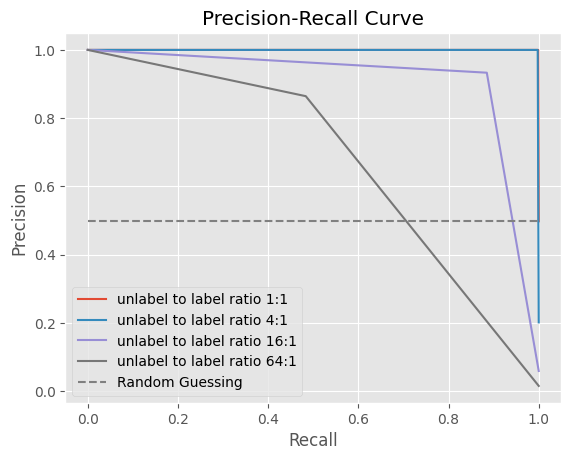

In [6]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(112, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.act = nn.ELU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)
        return x

multipliers = [1,4, 16, 64] #16, 32, 64, 128
test_accs = []
test_losses = []
for multip in multipliers:
  print('experiment with multiple:' + str(multip))
  ## loading data
  X_pos = np.load(FOLDERNAME + '/partial_perfect_in_icsd.npy')
  X_neg = np.load(FOLDERNAME + '/not_in_icsd_proofread.npy')
  X_neg = X_neg[:10899*multip, :]

  #concatenate the features together and scale
  X = np.concatenate((X_pos, X_neg), axis = 0)
  std_scale=preprocessing.StandardScaler().fit(X)
  X = std_scale.transform(X)

  #get output label
  y = []

  y=get_labels(X_pos,X_neg)

  # Split the data into training and testing sets
  X_da_train, X_test, y_da_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

  # Check if GPU is available
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # Convert the data to PyTorch tensors and move them to the GPU
  X_da_train = torch.tensor(X_da_train, dtype=torch.float32).to(device)
  y_da_train = torch.tensor(y_da_train, dtype=torch.float32).to(device)
  X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
  y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
  skf = StratifiedKFold(n_splits=5, shuffle=True)

  # Hyperparameters
  batch_size = 32
  learning_rate = 0.001
  num_epochs = 10

  # Lists to store losses and accuracies
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []

  # Perform k-fold cross-validation
  for train_index, val_index in skf.split(X_da_train.cpu().numpy(), y_da_train.cpu().numpy()):
      # Move the data back to CPU
      X_train, X_val = X_da_train[train_index].cpu(), X_da_train[val_index].cpu()
      y_train, y_val = y_da_train[train_index].cpu(), y_da_train[val_index].cpu()

      # Convert data to PyTorch tensors and move to device
      X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
      y_train = torch.tensor(y_train, dtype=torch.long).to(device)
      X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
      y_val = torch.tensor(y_val, dtype=torch.long).to(device)

      # Create DataLoader for batch training
      train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
      train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

      # Initialize model, loss function, and optimizer
      model = MLP().to(device)
      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(model.parameters(), lr=learning_rate)

      # Training loop
      for epoch in range(num_epochs):
          model.train()
          running_loss = 0.0
          correct = 0
          total = 0

          for inputs, labels in train_loader:
              optimizer.zero_grad()
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()

              running_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

          # Compute training accuracy and loss
          train_acc = 100 * correct / total
          train_loss = running_loss / len(train_loader)

          # Record training accuracy and loss
          train_accs.append(train_acc)
          train_losses.append(train_loss)

          # Evaluation on validation set
          model.eval()
          with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_acc = 100 * (val_predicted == y_val).sum().item() / y_val.size(0)
            # Record validation accuracy and loss
            val_accs.append(val_acc)
            val_losses.append(val_loss.item())

            # Calculate confusion matrix
            val_true = y_val.cpu().numpy()
            val_pred = val_predicted.cpu().numpy()
            tn, fp, fn, tp = confusion_matrix(val_true, val_pred).ravel()

            # Calculate rates
            val_tp_rate = tp / (tp + fn)
            val_tn_rate = tn / (tn + fp)
            val_fp_rate = fp / (fp + tn)
            val_fn_rate = fn / (fn + tp)

            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
                  f"Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.2f}%")
            print(f"TP: {val_tp_rate}, " f"TN: {val_tn_rate}, " f"FP: {val_fp_rate}, " f"FN: {val_fn_rate}")
  # Testing
  with torch.no_grad():
    test_outputs = model(X_test)
    y_test = y_test.long()
    test_loss = criterion(test_outputs, y_test)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_acc = 100 * (test_predicted == y_test).sum().item() / y_test.size(0)
    test_tp = ((test_predicted == 1) & (y_test == 1)).sum().item()
    test_tn = ((test_predicted == 0) & (y_test == 0)).sum().item()
    test_fp = ((test_predicted == 1) & (y_test == 0)).sum().item()
    test_fn = ((test_predicted == 0) & (y_test == 1)).sum().item()
    # Record testing accuracy and loss
    test_accs.append(test_acc)
    test_losses.append(test_loss.item())

    print(f"Testing - "
          f"Loss: {test_loss.item():.4f}, "
          f"Acc: {test_acc:.2f}%, "
          f"TP: {test_tp}, "
          f"TN: {test_tn}, "
          f"FP: {test_fp}, "
          f"FN: {test_fn}")
    
    precision, recall, _ = precision_recall_curve(val_true, val_pred)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f"unlabel to label ratio {multip}:1")

# Plot random guessing line
plt.plot([0, 1], [0.5, 0.5], linestyle="--", color="gray", label="Random Guessing")

# Set plot properties
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

# Show the plot
plt.show()